In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

tf.test.gpu_device_name()

''

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


8


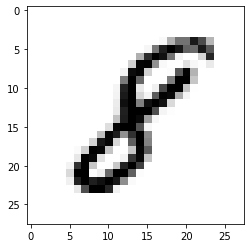

In [5]:
image_index = 7777
print(y_train[image_index])
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [8]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.3656 - accuracy: 0.8889
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0947 - accuracy: 0.9720
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0625 - accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0430 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0324 - accuracy: 0.9892
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0300 - accuracy: 0.9903
Epoch 7/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0248 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0198 - accuracy: 0.9929
Epoch 9/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0199 - accuracy: 0.9929
Epoch 10/10
1875/1875 [==============================] - 30s 16m

In [9]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0526 - accuracy: 0.9867


[0.052635930478572845, 0.9866999983787537]

9


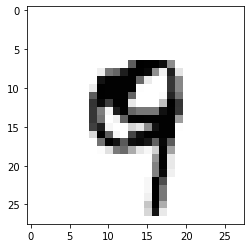

In [10]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


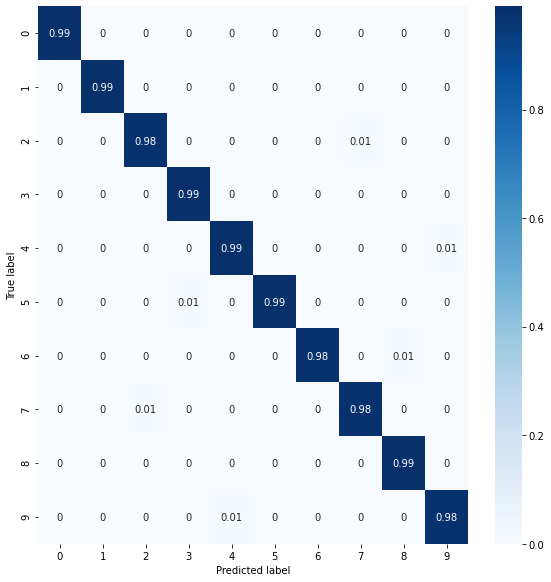

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns

y_pred=model.predict_classes(x_test)
classes = [0,1,2,3,4,5,6,7,8,9]
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,
index = classes,
columns = classes)
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

0


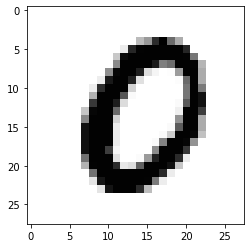

In [ ]:
image_index = 5353
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

In [ ]:
import cv2
import numpy as np

In [ ]:
image = cv2.imread('/content/drive/My Drive/Numbers/0.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255

[[2.5940517e-02 8.9101079e-05 1.1141497e-03 2.8220451e-04 2.1836793e-04
  1.3146276e-04 2.6190846e-05 1.3431195e-03 2.7415373e-03 9.6811330e-01]] 9


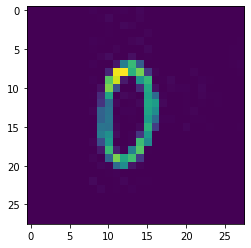

In [ ]:
predict = model.predict(image)
plt.imshow(image.reshape(28, 28))
print(predict, predict.argmax())

[[7.0628507e-06 2.4788532e-02 4.3820936e-02 7.9592951e-03 2.2555141e-04
  6.9165105e-07 1.2304851e-06 9.2236024e-01 8.2023424e-04 1.6153403e-05]] 7


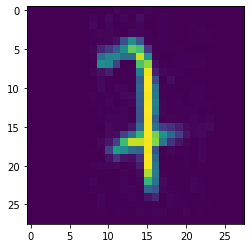

In [ ]:
image = cv2.imread('/content/drive/My Drive/Numbers/7.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255
predict = model.predict(image)
plt.imshow(image.reshape(28, 28))
print(predict, predict.argmax())

[[6.5322861e-04 1.8539419e-03 5.6799286e-07 4.4654500e-10 9.0075560e-02
  2.2883610e-04 9.0695971e-01 6.7807327e-06 2.2090283e-04 4.8165913e-07]] 6


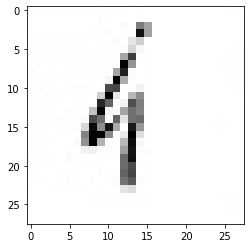

In [ ]:
image = cv2.imread('/content/drive/My Drive/Numbers/4_2.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255
predict = model.predict(image)
plt.imshow(image.reshape(28, 28),cmap='Greys')
print(predict, predict.argmax())

[[5.6576711e-05 3.6771749e-03 2.5048774e-02 8.8718766e-01 2.5324844e-06
  2.4524503e-04 1.0175793e-05 3.7311245e-05 1.4599620e-05 8.3719887e-02]] 3


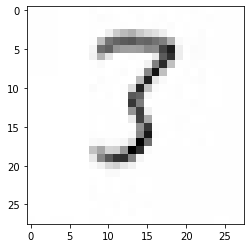

In [ ]:
image = cv2.imread('/content/drive/My Drive/Numbers/3_3.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255
predict = model.predict(image)
plt.imshow(image.reshape(28, 28),cmap='Greys')
print(predict, predict.argmax())

[[1.9533490e-03 2.7010873e-02 6.4614140e-03 7.9311091e-01 3.6214222e-03
  5.3697154e-02 1.1090830e-03 6.0955971e-04 7.4592680e-03 1.0496698e-01]] 3


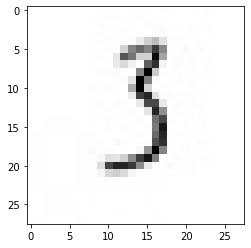

In [ ]:
image = cv2.imread('/content/drive/My Drive/Numbers/3.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255
predict = model.predict(image)
plt.imshow(image.reshape(28, 28),cmap='Greys')
print(predict, predict.argmax())

[[2.2842199e-08 1.4924101e-03 1.6827804e-06 8.9450336e-01 1.5972088e-06
  1.1762084e-02 5.4775137e-05 2.0218878e-03 6.1068618e-05 9.0101108e-02]] 3


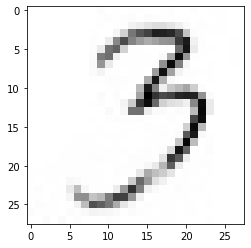

In [ ]:
image = cv2.imread('/content/drive/My Drive/Numbers/3_2.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255
predict = model.predict(image)
plt.imshow(image.reshape(28, 28),cmap='Greys')
print(predict, predict.argmax())

[[3.3743052e-12 1.2572302e-09 2.1517207e-10 1.6868100e-13 9.9999940e-01
  1.7324421e-10 1.8616256e-11 5.8581753e-07 3.9720791e-10 7.8514600e-10]] 4


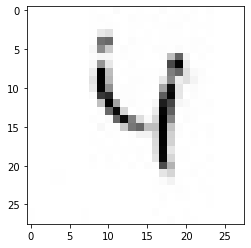

In [ ]:
image = cv2.imread('/content/drive/My Drive/Numbers/4.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255
predict = model.predict(image)
plt.imshow(image.reshape(28, 28),cmap='Greys')
print(predict, predict.argmax())

[[1.1599131e-09 9.4399074e-06 5.9261023e-05 2.2823966e-05 4.4656630e-08
  3.9322611e-08 1.1469973e-08 9.9990833e-01 1.3997460e-10 2.2483906e-08]] 7


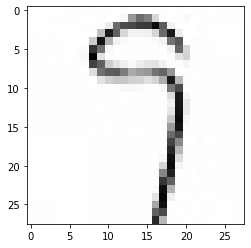

In [ ]:
image = cv2.imread('/content/drive/My Drive/Numbers/9_3.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255
predict = model.predict(image)
plt.imshow(image.reshape(28, 28),cmap='Greys')
print(predict, predict.argmax())

[[0.0004421  0.14658755 0.00241095 0.05062199 0.23070404 0.00066785
  0.00080906 0.42749053 0.0029387  0.1373273 ]] 7


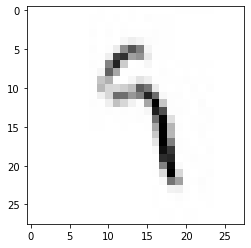

In [ ]:
image = cv2.imread('/content/drive/My Drive/Numbers/9.jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (28, 28))
image = image.astype('float32')
image = image.reshape(1, 28, 28, 1)
image = 255-image
image /= 255
predict = model.predict(image)
plt.imshow(image.reshape(28, 28),cmap='Greys')
print(predict, predict.argmax())